## Install and Import Dependencies

In [1]:
!pip install -q torch torchvision torchaudio

In [2]:
!pip install -q "stable-baselines3[extra]" "protobuf==3.20.*"

In [3]:
!pip install -q mss pydirectinput pytesseract

In [4]:
!pip install pydirectinput

In [5]:
# chrome://dino/

In [6]:
from mss import mss
from matplotlib import pyplot as plt
from gym import Env
from gym.spaces import Box, Discrete

import numpy as np
# import pydirectinput ??
import pytesseract
import time
import cv2

## Building Environment

### Create Environment

In [50]:
class WebGame(Env):
    #Setup the environment action and observation space
    def __init__(self):
        pass
    #called to do something in the game
    def step(self,action):
        pass
    #restart the game
    def reset(self):
        pass
    #visualize the game
    def render(self):
        pass
    #this closes down the observation
    def close(self):
        pass
    #get the part of the observation of the game that we want
    def get_observation(self):
        pass
    #get the "done" text using OCR
    def  get_done(self):
        pass

In [8]:
class WebGame(Env):
    def __init__(self):
        super().__init__()
        self.observation_space=Box(low=0, high=255, shape=(1,83,100),dtype=np.uint8)
        self.action_space=Discrete(3)

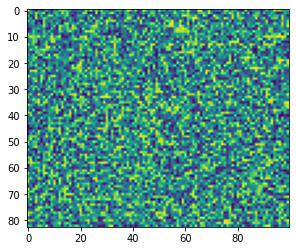

In [9]:
env=WebGame()
firstpic=env.observation_space.sample()[0]
plt.imshow(firstpic)

In [90]:
class WebGame(Env):
    def __init__(self):
        super().__init__()
        self.observation_space=Box(low=0, high=255, shape=(1,83,100),dtype=np.uint8)
        self.action_space=Discrete(3)
        
        self.cap=mss()
        self.game_location={"top":300,"left":0, "width":600, "height":500}
        self.done_location={"top":405,"left":63, "width":660, "height":70}
        
    def step(self,action):
        pass
    def reset(self):
        pass
    def render(self):
        pass
    def close(self):
        pass
    def get_observation(self):
        #get raw screen capture of the game 
        raw=np.array(self.cap.grab(self.game_location))[:,:,:3].astype(np.uint8)
        gray=cv2.cvtColor(raw,cv2.COLOR_BGR2GRAY)
        resized=cv2.resize(gray, (100,83))
        channel=np.reshape(resized, (1,83,100))
        return channel
    def get_done(self):
        done_cap=np.array(self.cap.grab(self.done_location))[:,:,:3].astype(np.uint8)
        return done_cap
        

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(1, 83, 100)


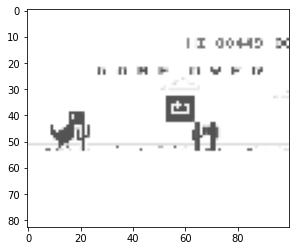

In [87]:
env=WebGame()
print(env.get_observation()[0])
print(np.array(env.get_observation()).shape)
plt.imshow(np.array(env.get_observation()[0]))
plt.imshow(cv2.cvtColor(env.get_observation()[0],cv2.COLOR_BGR2RGB))

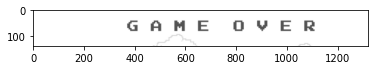

In [91]:
env=WebGame() # have to initialize the class first
plt.imshow(env.get_done())